In [4]:
#Loss should reach minimum and at minimum loss we get the best fit line
from sklearn.datasets import make_regression
import numpy as np

In [5]:
#doing linear regression for these two points using ols and gradient descent
#gradient descent tells us that no matter whereu start, if you take correct steps, you end up in the required position
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13) #directly taking data(i/p and o/p) (no df)

# n_samples : The number of samples
# n_features : The number of features.
# n_informative :  number of informative features, i.e., the number of features used to build the linear model used to generate the output.
# n_targets : The number of regression targets, i.e., the dimension of the y output vector associated with a sample. By default, the output is a scalar.
# noise : The standard deviation of the gaussian noise applied to the output
# random_state: Determines random number generation for dataset creation
# random_state = any int value means every time when you run your program you will get the same output 
# because of splitting between train and test does not varies within.


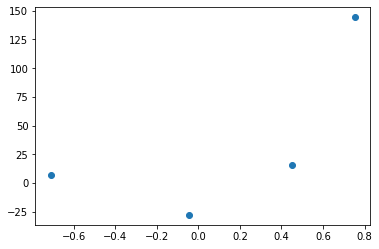

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [7]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [8]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [9]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.coef_       #m          # slope value

array([78.35063668])

In [12]:
model.intercept_  #intercept / c value #ACTUAL VALUE OF SLOPE SHOULD BE 25.15

26.15963284313262

In [13]:
model.predict(X)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

In [14]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

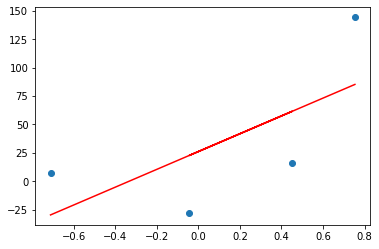

In [15]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')
#best fit line using ols
#using gradient descent the line which we get will be somewhere close to this itself

In [16]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept c = 0
# taking intercept from a random value(at 0), at the end we will reach near 26.15
y_pred = ((78.35 * X) + 0)  #put m and c values to plot the line #reshaping to get the value in straight line form 
#reshape() Gives a new shape to an array without changing its data
print(y_pred) #it is initially a matrix
y_pred = ((78.35 * X) + 0).reshape(4) 
print(y_pred) #we convert to a vector now 

[[-55.81580837]
 [ 35.39949674]
 [ -3.48681619]
 [ 59.05759577]]
[-55.81580837  35.39949674  -3.48681619  59.05759577]


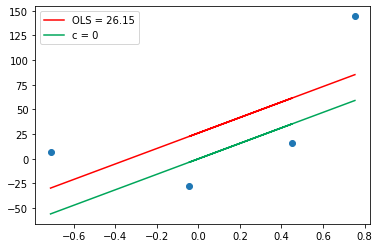

In [29]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS = 26.15')
plt.plot(X,y_pred,color='#00a65a',label='c = 0')
plt.legend()
plt.show()
#red line is best fit line, green is gradient descent line , when c = 0

In [18]:
#Iteration/epoch 1
#by changing c value my line will move up and down
#by changing m value ,my line wil rotate
m = 78.35 #SLOPE FIXED 
c = 0     #THIS WE WILL CHANGE
# (-2) * summ(yi - m*xi - c)    #formula   
loss_slope = -2 * np.sum(y - m*X.ravel() - c)   #to calculate slope at c=0
loss_slope
# #The numpy. ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).
# A copy is made only if needed


-209.27763408209216

In [19]:
# Lets take learning rate = 0.1
lr = 0.1
# Step size = learnig rate * slope
step_size = loss_slope*lr
step_size

-20.927763408209216

In [20]:
# Calculating the new intercept
c = c - step_size
c   #we took the jump from 0 to 20.92 directly

20.927763408209216

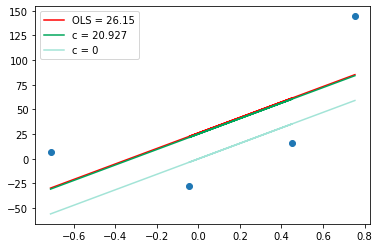

In [30]:
#plot the line for the updated intercept 
y_pred1 = ((78.35 * X) + c).reshape(4)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS = 26.15')
plt.plot(X,y_pred1,color='#00a65a',label='c = 20.927')  #correct line right now(going near 26.15)
plt.plot(X,y_pred,color='#A3E4D7',label='c = 0')
plt.legend()
plt.show()

In [22]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - c)
loss_slope

-41.85552681641843

In [23]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [24]:
c = c - step_size
c  # 2nd time updated intercept value 

25.11331608985106

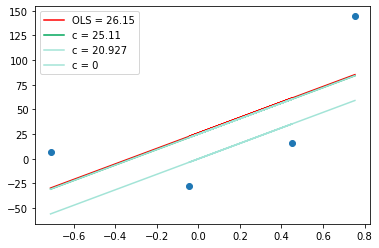

In [31]:
y_pred2 = ((78.35 * X) + c).reshape(4)

plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS = 26.15')
plt.plot(X,y_pred2,color='#00a65a',label='c = 25.11') #updated line is almost near the best fit line 
plt.plot(X,y_pred1,color='#A3E4D7',label='c = 20.927')
plt.plot(X,y_pred,color='#A3E4D7',label='c = 0')
plt.legend()
plt.show()

In [26]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - c)
loss_slope

-8.371105363283675

In [27]:
step_size = loss_slope*lr   #step size is decreasing as we near the best fit line 
step_size

-0.8371105363283675

In [ ]:
c = c - step_size  #very close to 26.15
c

25.95042662617943

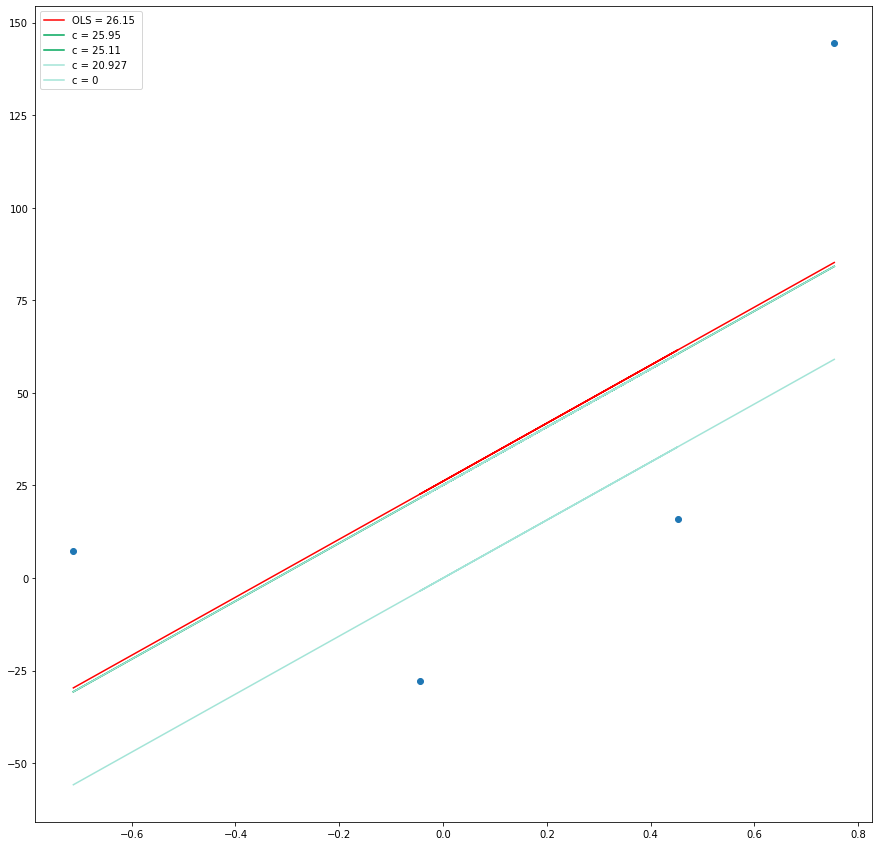

In [32]:
y_pred3 = ((78.35 * X) + c).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red',label='OLS = 26.15 ')
plt.plot(X,y_pred3,color='#00a65a',label='c = 25.95') #this is much closer to the best fit line 
plt.plot(X,y_pred2,color='#00a65a',label='c = 25.11') #updated line is almost near the best fit line 
plt.plot(X,y_pred1,color='#A3E4D7',label='c = 20.927')
plt.plot(X,y_pred,color='#A3E4D7',label='c = 0')
plt.legend()
plt.show()

In [ ]:
#we reach the best fit line in 3 or 4 iterations 
#we take long steps when far off, short steps when near optimal value (learning rate)
# the beauty of this algorithm is that even if we start from some random value(like not 0), even then we get the best fit line 
#ex- take c = 100, first line won't be close at all, but then it will give proper values quickly 

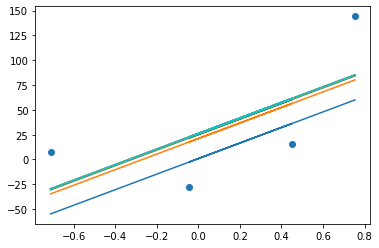

In [ ]:
#the same entire thing in a loop
c = -100  #this time c value is -100
m = 78.35
lr = 0.1  #if learning rate is 0.01(very small) we won't even reach the value, we need to increase epochs
#we can reach the value if we increase epochs from 10 to 100

epochs = 10 #10 loops

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - c)
  c = c - (lr * loss_slope)

  y_pred = m * X + c

  plt.plot(X,y_pred)

plt.scatter(X,y)

In [ ]:
#the name gradient becaue we don't differentiate the formula only on the basis of c, we use m and c both for differentiation 
#Derivatives wrt both m and c then we dont call it differentiation we call it derivative
#random state gives consistent results

In [ ]:
#gradient descent is very sensitive to loss functions 
#convex function has only a global minima (if i draw a line btwn any two points, the line never cross the function in convex )
#a non conve function has local as well as global minima  (line crosses the function if not convex)

In [ ]:
#harsh reality is that in non convex, the algorithm can give us the local minima as the best optimized position,
# but we may never reach the global minima, hence initialization plays a key role,(initialization depends on loss functions, etc)
#it is easy to descend if we have the data in similar scale (we get a circular contour plot, rather than a very flat one)